# On the connectedness of GO terms in Interactomes

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import networkx as nx
import pickle

Populating the interactive namespace from numpy and matplotlib


# I. Load the Interactomes

In [2]:
inbiomap_experimentally = pd.read_csv('/Users/alex/Documents/proteomics/data_preparation/interactomes/InBioMap/inbiomap_exp.normalized.cleaned.connected.tsv', sep='\t')
inbiomap_full = pd.read_csv('/Users/alex/Documents/proteomics/data_preparation/interactomes/InBioMap/inbiomap.normalized.cleaned.connected.tsv', sep='\t')

iref13 = pd.read_csv('/Users/alex/Documents/proteomics/data_preparation/interactomes/iref13/iref13.cleaned.connected.tsv', sep='\t')
iref14 = pd.read_csv('/Users/alex/Documents/proteomics/data_preparation/interactomes/iref14/iref14.cleaned.connected.tsv', sep='\t')
iref13_iref14_merged = pd.read_csv('/Users/alex/Documents/proteomics/data_preparation/interactomes/iref14/iref13_iref14_merged.cleaned.connected.tsv', sep='\t')

# string10_experimentally = pd.read_csv('/Users/alex/Documents/proteomics/data_preparation/interactomes/string10/data/string10.exp.normalized.cleaned.tsv', sep='\t')
# string10_full = pd.read_csv('/Users/alex/Documents/proteomics/data_preparation/interactomes/string10/data/string10.full.normalized.cleaned.tsv', sep='\t')

In [3]:
inbiomap_experimentally_graph = nx.from_pandas_dataframe(inbiomap_experimentally, 'protein1', 'protein2', edge_attr=['confidence'])
inbiomap_full_graph = nx.from_pandas_dataframe(inbiomap_full, 'protein1', 'protein2', edge_attr=['confidence'])

iref13_graph = nx.from_pandas_dataframe(iref13, 'protein1', 'protein2', edge_attr=['confidence'])
iref14_graph = nx.from_pandas_dataframe(iref14, 'protein1', 'protein2', edge_attr=['confidence'])
iref13_iref14_merged_graph = nx.from_pandas_dataframe(iref13_iref14_merged, 'protein1', 'protein2', edge_attr=['confidence'])

# string10_experimentally_graph = nx.from_pandas_dataframe(string10_experimentally, 'protein1', 'protein2', edge_attr=['confidence'])
# string10_full_graph = nx.from_pandas_dataframe(string10_full, 'protein1', 'protein2', edge_attr=['confidence'])

# II. Verify that these are connected graphs

In [4]:
print('inbiomap_experimentally\t', nx.number_connected_components(inbiomap_experimentally_graph))
print('inbiomap_full\t\t', nx.number_connected_components(inbiomap_full_graph))

print('iref13\t\t\t', nx.number_connected_components(iref13_graph))
print('iref14\t\t\t', nx.number_connected_components(iref14_graph))
print('iref13_iref14_merged\t', nx.number_connected_components(iref13_iref14_merged_graph))

# print('string10_experimentally\t', nx.number_connected_components(string10_experimentally_graph))
# print('string10_full\t\t', nx.number_connected_components(string10_full_graph))

inbiomap_experimentally	 1
inbiomap_full		 1
iref13			 1
iref14			 1
iref13_iref14_merged	 1


# III. Prepare the GO annotations

In [5]:
GO = pd.read_csv('../../protein_embeddings/GO/GO.normalized.tsv', sep='\t', index_col=0, header=0)
GO.head()

,Gene ontology IDs
FN3K,GO:0005829; GO:0016301; GO:0030387; GO:0030389...
FNBP4,GO:0016607
FNDC3A,GO:0000139; GO:0001669; GO:0003723; GO:0005794...
FNDC7,GO:0005576
FNIP1,GO:0000122; GO:0001932; GO:0001934; GO:0002327...


### We'll need to transpose that datastructure in order for it to be useful to us

In [6]:
GO = {gene: terms.strip('\'').split('; ') for gene, terms in GO.to_dict()['Gene ontology IDs'].items()}

In [7]:
def invert_dol_nonunique(d):  # thanks https://www.saltycrane.com/blog/2008/01/how-to-invert-dict-in-python/
    newdict = {}
    for k in d:
        for v in d[k]:
            newdict.setdefault(v, []).append(k)
    return newdict

# IV. Examine the connectedness of GO subgraphs, systematically

In [10]:
graphs = [inbiomap_experimentally_graph,
          inbiomap_full_graph,
          iref13_graph,
          iref14_graph,
          iref13_iref14_merged_graph]

In [25]:
gene_lists = list(map(list, GO.values()))

In [26]:
gene_lists_cardinalities = list(map(len, gene_lists))

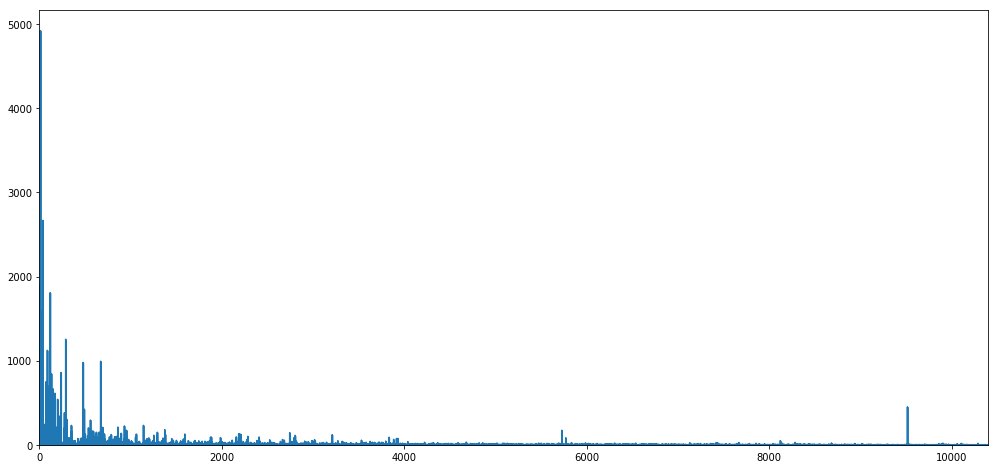

In [27]:
pd.Series(gene_lists_cardinalities).plot.area(figsize=(17,8))

In [28]:
gene_lists = [gene_list for gene_list in gene_lists if len(gene_list) > 3]

In [29]:
gene_lists_cardinalities = list(map(len, gene_lists))

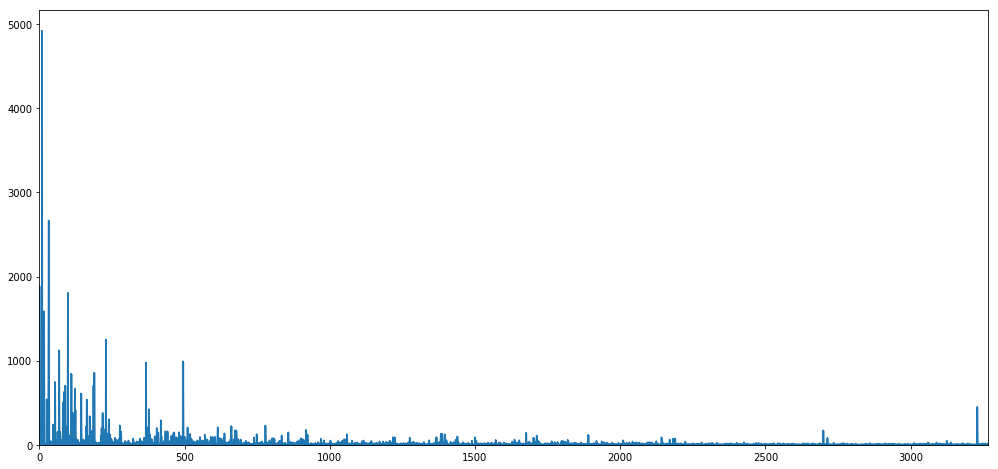

In [34]:
pd.Series(gene_lists_cardinalities).plot.area(figsize=(17,8))

In [35]:
gene_lists = [gene_list for gene_list in gene_lists if len(gene_list) > 5 and len(gene_list) < 100]

In [36]:
def connectedness(subG): 
    num_subG_nodes = subG.number_of_nodes()
    num_nodes_in_complete_graph_with_size_subG = num_subG_nodes * (num_subG_nodes - 1) / 2
    return (subG.number_of_edges() / (num_nodes_in_complete_graph_with_size_subG + 1))

def connectednesses(G): return list(map(connectedness, [G.subgraph(genes) for genes in gene_lists]))

In [37]:
graph_names = ["inbiomap_experimentally_graph", "inbiomap_full_graph", "iref13_graph", "iref14_graph", "iref13_iref14_merged_graph"]

In [38]:
graph_connectednesses = pd.DataFrame(dict(zip(graph_names, [connectednesses(graph) for graph in graphs])))
graph_connectednesses.head()

,inbiomap_experimentally_graph,inbiomap_full_graph,iref13_graph,iref13_iref14_merged_graph,iref14_graph
0,0.014599,0.012987,0.018868,0.016529,0.016529
1,0.000000,0.187500,0.000000,0.000000,0.000000
2,0.001499,0.001348,0.002012,0.001678,0.001779
3,0.004292,0.005338,0.000000,0.000000,0.000000
4,0.000000,0.016529,0.000000,0.000000,0.000000


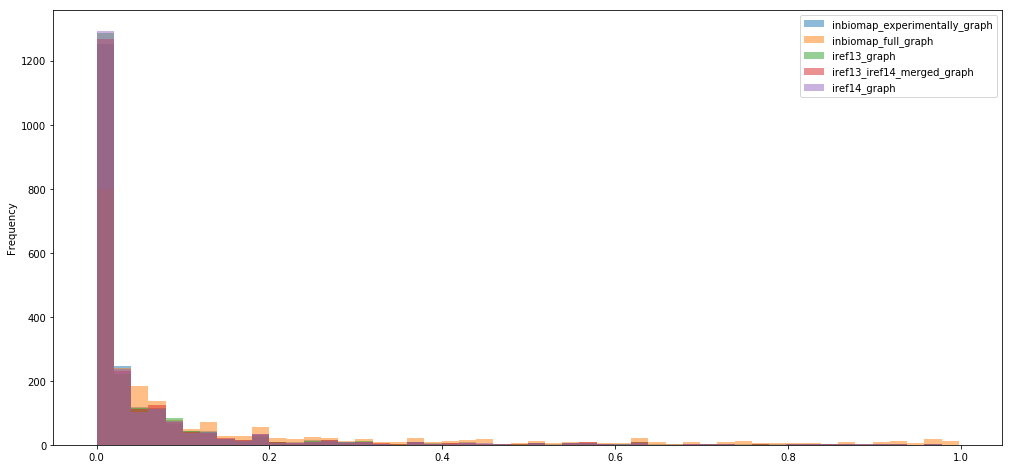

In [40]:
graph_connectednesses.plot.hist(alpha=0.5, figsize=(17,8), bins=50)

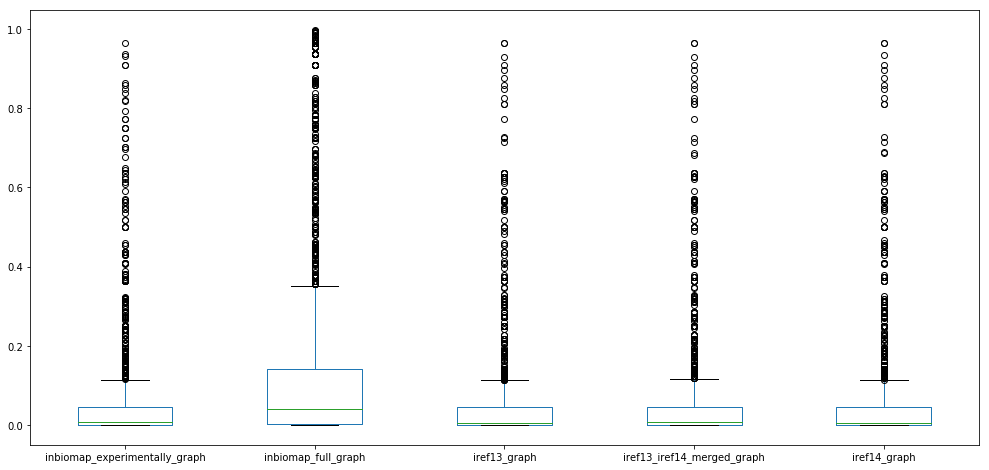

In [41]:
graph_connectednesses.plot.box(figsize=(17,8))

# V. Examine the number of components in GO terms, systematically

In [45]:
def connectedness(subG): return nx.number_connected_components(subG) / (subG.number_of_nodes() + 1)
    
def connectednesses(G): return list(map(connectedness, [G.subgraph(genes) for genes in gene_lists]))

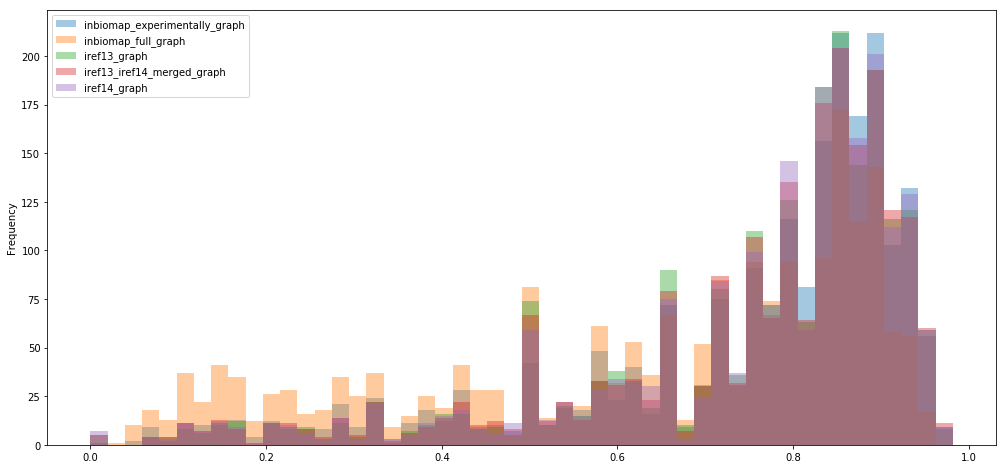

In [47]:
graph_connectednesses = pd.DataFrame(dict(zip(graph_names, [connectednesses(graph) for graph in graphs])))
graph_connectednesses.plot.hist(alpha=0.4, figsize=(17,8), bins=50)